<a href="https://colab.research.google.com/github/choclox/50k-IA-Songs/blob/main/50k_songs_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('songs.csv')
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [ ]:
def filter_by(filter):
  try:
    data = {df.loc[i, "song_id"]:df.loc[i, filter] for i in range(len(df))}
    print(type(data["SP0001"]))
    return data
  except KeyError :
    print("Key not found")
    return None

In [ ]:
def song_name(data):
  info = {}
  for id in data.keys():
    index = int(id[2:])
    info[df.at[index,"song_title"]] = data[id]
  return info

In [ ]:
def total(data):
  total = 0
  for id in data.keys():
    total += data[id]
  return total

def percent(data, total):
  for id in data.keys():
    data[id] = (data[id]/total)*100
  return data

<class 'numpy.int64'>
{'Important leader dream.': 99999128, 'Skin claim.': 99998468, 'Side threat.': 99996451, 'New.': 99993859, 'Into enough modern red.': 99992156}


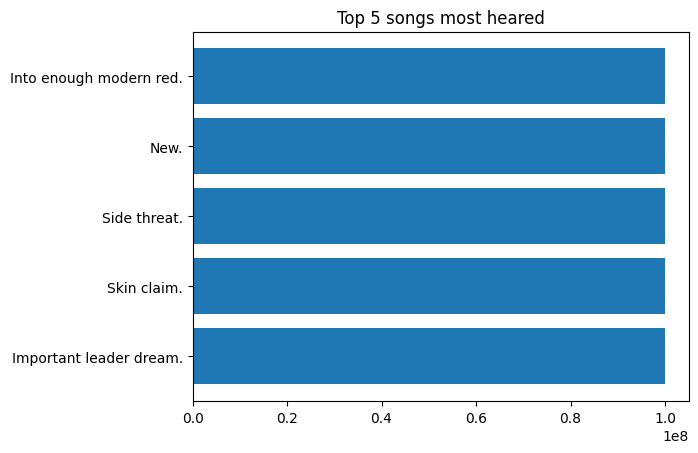

In [ ]:
# Top 5 songs most heared
data = filter_by("stream")
sorted_data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))
topFive = {k: sorted_data[k] for k in list(sorted_data)[:5]} # returns the id of the top five songs and the time streamed
dataNames = song_name(topFive)
x = np.array(list(dataNames.keys()))
y = np.array(list(dataNames.values()))
print(dataNames)
plt.barh(x,y)
plt.title("Top 5 songs most heared")
plt.show()

<class 'str'>
{'Electronic': 25.135999999999996, 'Pop': 25.068, 'Hip-Hop': 24.596, 'Folk': 5.118, 'R&B': 3.026, 'Jazz': 5.008, 'Classical': 5.0840000000000005, 'Country': 5.022, 'Reggae': 1.942}


Text(0.5, 1.0, 'Genres')

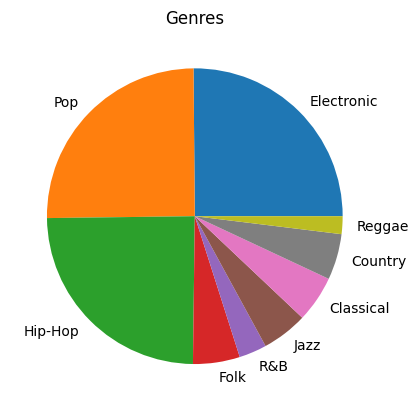

In [ ]:
# Pie chart - genres
genres = filter_by("genre")
dataCount = {}
for genre in genres.keys():
  if genres[genre] in dataCount.keys():
    dataCount[genres[genre]] += 1
  else:
    dataCount[genres[genre]] = 1
dataCount = percent(dataCount, total(dataCount))
print(dataCount)
x = np.array(list(dataCount.values()))
labels = dataCount.keys()
plt.pie(x, labels=labels)
plt.title("Genres")

<class 'str'>


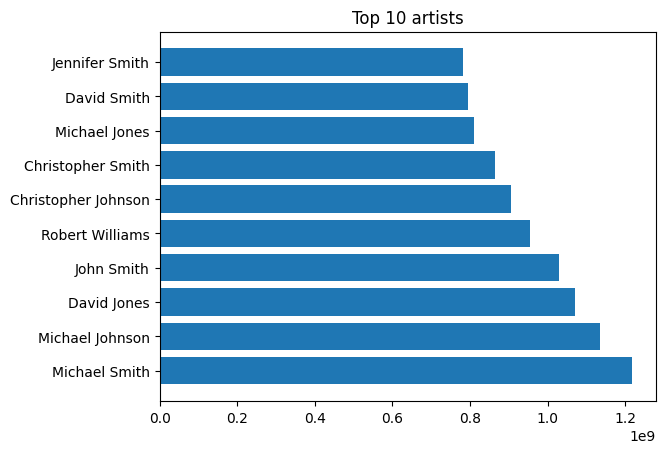

In [ ]:
# Top 10 artists
artists = filter_by("artist")
dataCount = {}
for id,artist in artists.items():
  index = int(id[2:]) -1
  if artists[id] in dataCount.keys():
    dataCount[artists[id]] += int(df.at[index,"stream"])
  else:
    dataCount[artists[id]] = int(df.at[index,"stream"])
sorted_data = dict(sorted(dataCount.items(), key=lambda item: item[1], reverse=True))
topFive = {k: sorted_data[k] for k in list(sorted_data)[:10]}
x = np.array(list(topFive.keys()))
y = np.array(list(topFive.values()))
plt.barh(x,y)
plt.title("Top 10 artists")
plt.show()

<class 'str'>
{'Yes': 50.166, 'No': 49.834}


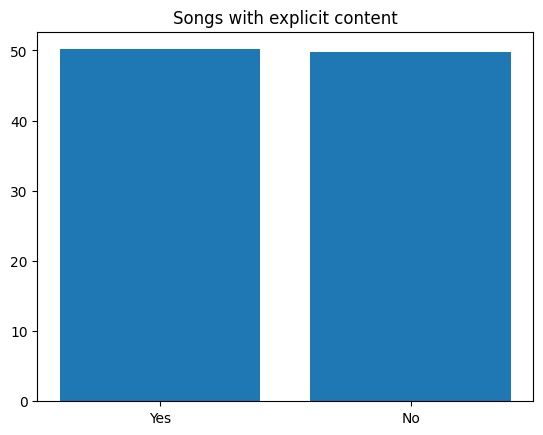

In [ ]:
# Songs with explicit content
content = filter_by("explicit_content")
dataCount = {}
for id,explicit in content.items():
  if explicit in dataCount.keys():
    dataCount[explicit] += 1
  else:
    dataCount[explicit] = 1
dataCount = percent(dataCount, total(dataCount))
x = np.array(list(dataCount.values()))
labels = np.array(list(dataCount.keys()))
print(dataCount)
plt.bar(labels,x)
plt.title("Songs with explicit content")
plt.show()